In [1]:
"""
This notebook analyzes the temperature data from sensor FC_L_3_1 or sensor_3 from the timeseries dataset
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read parquet
df_ts = pd.read_parquet("data/timeseries.parquet")
# Listing all the unique sensors
sensors = df_ts["device_name"].unique()
print("All sensors:",sensors)

All sensors: ['FC_23_29' 'FC_23_6' 'FC_6_30' 'FC_L_3_1']


In [2]:
### Function that uses the time stamp from dataframe as exact x-axis for plotting. 
"""
Input: date_time_local	column from dataset
returns: string of times only for plotting
"""
def extract_time_str(col, fmt="%H:%M:%S"):
    col = pd.to_datetime(col)       # ensure datetime dtype
    return col.dt.strftime(fmt)

In [3]:
# Extracting sensor 3 only
df_device3 = df_ts[df_ts["device_name"] == sensors[3]].reset_index(drop=True)

# Nights only
df_device3_night = df_device3.iloc[4:44].reset_index(drop=True)

df_device3_night.at[23, "value"] = "Unoccupied"   
avg = (22.299999237060547+22.299999237060547) / 2  # Fill missing value with avg of adjacent temps
df_device3_night.at[22, "value"] = avg
df_device3_night.at[24, "value"] = 0.0

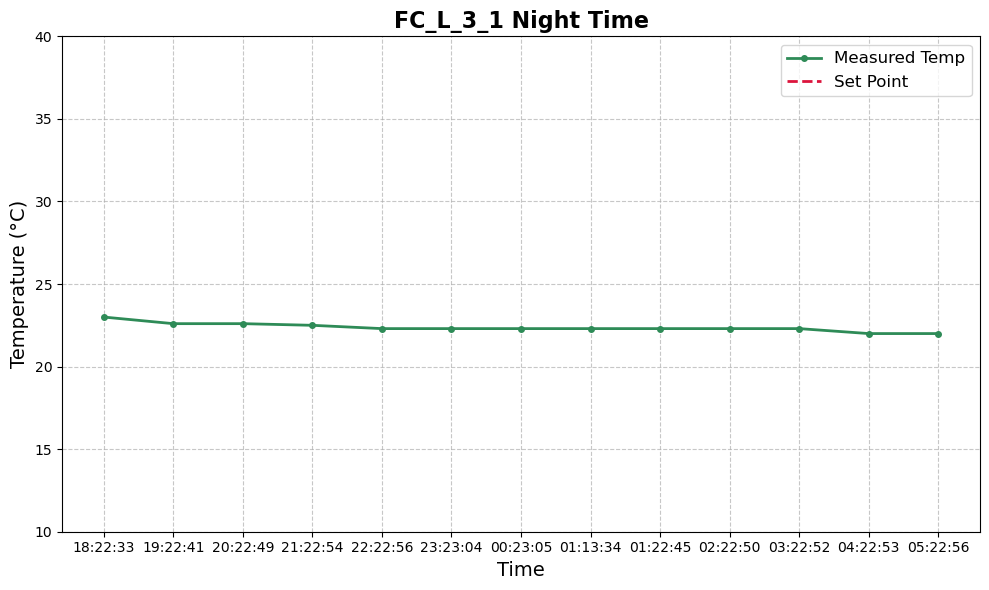

In [4]:
setpoint = 0.0
set_points3_night = df_device3_night[df_device3_night["field"] == "effective_cooling_zone_air_temperature_setpoint"]
y_set = np.array(set_points3_night["value"]).astype(float)
x_set = np.arange(y_set.size)

temps3_night = df_device3_night[df_device3_night["field"] == "zone_air_temperature_sensor"]
y_temp = np.array(temps3_night["value"]).astype(float)
x_temp = np.arange(y_temp.size)
x = extract_time_str(temps3_night["date_time_local"])

################################################
plt.figure(figsize=(10,6))  # bigger, clearer figure

# Plot measured temps
plt.plot(x, y_temp, 
         color='seagreen', linewidth=2, marker='o', markersize=4, 
         label="Measured Temp")

# Plot set point
plt.plot(x, np.ones(x_temp.size)*setpoint, 
         color="crimson", linewidth=2, linestyle="--", 
         label="Set Point")

# Titles and labels
plt.title("FC_L_3_1 Night Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.ylim(10,40)

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=12, loc="best")

# Tighter layout
plt.tight_layout()
plt.show()

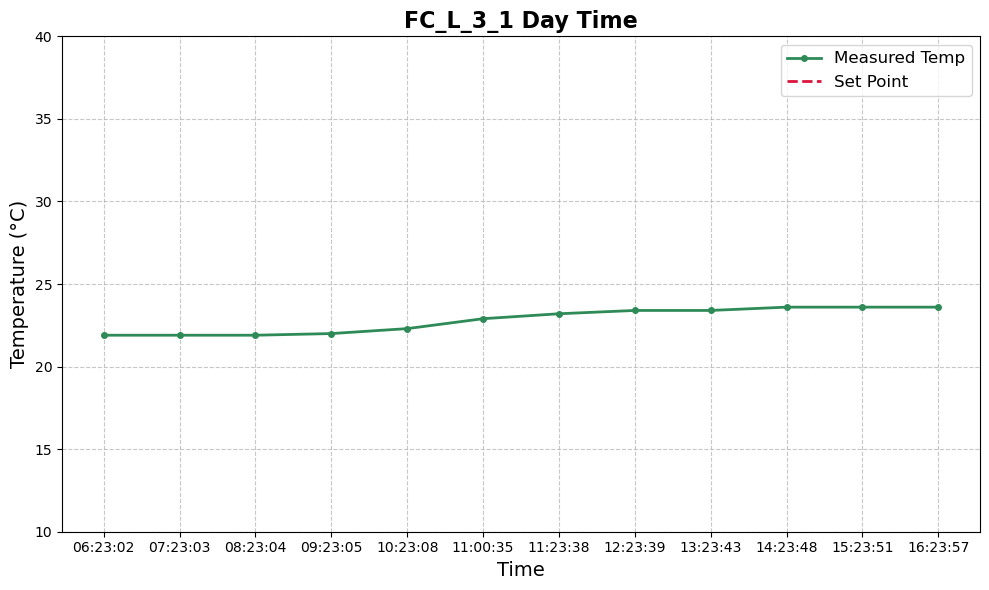

In [5]:
### Making day dataframe
df_device3_day = df_device3.iloc[44:79].reset_index(drop=True)

setpoint = 0.0
set_points3_day = df_device3_day[df_device3_day["field"] == "effective_cooling_zone_air_temperature_setpoint"]
y_set = np.array(set_points3_day["value"]).astype(float)
x_set = np.arange(y_set.size)

temps3_day = df_device3_day[df_device3_day["field"] == "zone_air_temperature_sensor"]
y_temp = np.array(temps3_day["value"]).astype(float)
x_temp = np.arange(y_temp.size)
x = extract_time_str(temps3_day["date_time_local"])

plt.figure(figsize=(10,6))  # bigger, clearer figure
##################################
# Plot measured temps
plt.plot(x, y_temp, 
         color='seagreen', linewidth=2, marker='o', markersize=4, 
         label="Measured Temp")

# Plot set point
plt.plot(x, np.ones(x_temp.size)*setpoint, 
         color="crimson", linewidth=2, linestyle="--", 
         label="Set Point")

# Titles and labels
plt.title("FC_L_3_1 Day Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.ylim(10,40)

# Grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=12, loc="best")

# Tighter layout
plt.tight_layout()
plt.show()

In [8]:
# Calculating rate of change metrics
variance_day = np.std(y_temp)
x = np.arange(y_temp.size)
# Calculating Rate of Change (roc) / heat up during the day
roc = np.gradient(y_temp, x)   # derivative wrt time
print(roc,"\n\n",np.mean(roc),"degC/per hour")

# Average difference between room temp and setpoint
print("\n Mean difference: ",np.mean(setpoint - y_temp))

[0.         0.         0.05000019 0.19999981 0.44999981 0.45000076
 0.25       0.09999943 0.10000038 0.10000038 0.         0.        ] 

 0.14166673024495444 degC/per hour

 Mean difference:  -22.8083332379659


In [7]:
y_temp

array([21.89999962, 21.89999962, 21.89999962, 22.        , 22.29999924,
       22.89999962, 23.20000076, 23.39999962, 23.39999962, 23.60000038,
       23.60000038, 23.60000038])